# Funktionen - Grundbegriffe, Beispiele und Eigenschaften (Teil I)
<a id="definition"></a>

<p class="blocksatz"> Dieses Notebook soll Ihnen dabei helfen, den analytischen Begriff der Funktion zu vertiefen. Sie werden dazu Grundbegriffe kennenlernen, die Sie durchaus in der Schule kennengelernt haben und werden entsprechende Beispiele zu wichtigen Funktionen unter die Lupe nehmen. </p>

<b> Python Grundlagen: </b> Schleifen, Kontrollstrukturen, Listen, iterative und rekursive Algorithmen, Plots<br>
<b> Math. Grundlagen:</b>  Abiturniveau Analysis<br>

<b>Inhaltsverzeichnis:</b> <br>
<ul>
 <li><a href="#funktion">Was ist eine Funktion?</a></li>
 <li><a href="#eigenschaften">Eigenschaften</a></li>
 <li><a href="#polynom">Die Ganzrationale Funktionen (Polynomfunktionen)</a></li>
 <li><a href="#polynomdivision">Die Polynomdivision</a></li>
 <li><a href="#betragsfunktion">Die Betragsfunktion</a></li>
 <li><a href="#exponentialfunktion">Die Exponentialfunktion</a></li>
 <li><a href="#umkehrfunktion">Die Umkehrfunktion: injektiv, surjektiv, bijektiv</a></li>
 <li><a href="#arkussinus">Die Arkussinus-Funktion</a></li>
</ul>
</p> 


### Was ist eine Funktion?
<a id="funktion"></a>

<div style="text-align: justify"> 

Sie kennen die Situation sicherlich aus dem Supermarkt: Ein Kilogramm Äpfel koste etwa 3,49€. Sie wiegen 3 Äpfel, bekommen den Aufkleber ausgedruckt und sollen dafür 2,09€ bezahlen. Wo ist der Zusammenhang? Nun, dem Informatiksystem "digitale Waage" wird durch das Wiegen mitgeteilt, dass die 3 Äpfel 600g wiegen. Anschließend muss also eine <i>Umrechnung</i> stattfinden, da nur der Preis pro Kilogramm angegeben ist. Die beiden Kenngrößen <i>Gewicht der Äpfel (in kg)</i> und <i>Preis (in €)</i> werden also in Beziehung gesetzt. Betrachten wir die Situation mathematisch, dann besteht hier formal ein funktionaler Zusammenhang zwischen zwei Größen: Genauer können wir sowohl alle möglichen Gewichte in kg als auch alle Preise der Äpfel in € als Mengen $M$ beziehungsweise $N$ auffassen. Zur weiteren Abstraktion kann man $M$ und $N$ als Teilmengen der reellen Zahlen setzen, d.h. jedes Gewicht und jeder Preis wird schlichtweg dimensionslos angegeben. Die anfänglichen 600g, respektive 2,09€ werden in dieser Modellierung daher als $ 600 \in M$ und $ 2{,}09 \in N$ geschrieben.

Dann haben wir eine <b>eindeutige Zuordnung</b> $$ f \colon M \longrightarrow N, \quad x \mapsto f(x) $$  wobei jedem Wert $x \in M$ eindeutig ein Wert $ y = f(x) \in N$ zugeordnet wird. Solche Zuordnungen nennen wir <b>Funktionen</b> oder <b>Abbildungen</b>. Der dazugehörige Term $f(x)$ ist der Funktionswert von $f$ an der Stelle $x$, die Menge $M$ wird Definitionsbereich genannt und $N$ heißt Wertemenge.

In unserem Beispiel könnte die digitale Waage also für die gewogenen Äpfel den Preis mithilfe der Funktion $$f \colon [0, \infty) \subseteq \mathbb{R} \longrightarrow \mathbb{R}, \quad f(x) = 3{,}49 \cdot x \quad $$ ausdrücken, wenn $x$ in kg und $f(x)$ in € angegeben sind. Infolgedessen kosten 3 Äpfel, die 600 g = 0,6 kg wiegen, demnach $f(0{,}6) = 3{,}49 \cdot 0{,}6 = 2{,}094$, d.h. 2,09€, wie angegeben.

Was ist zur Abgrenzung dann <b>keine Funktion</b>? Eine mehrfache Zuordnung von $y$-Werten zu einem $x$-Wert würde die Eindeutigkeit verletzen, sodass es sich in diesem Fall um keine Funktion mehr handeln kann. Das kann man schnell geometrisch erkennen, wenn man sich den Graphen einer Funktion $f$ anschaut: Das sind alle möglichen eingetragenen Punktepaare $(x,f(x))$ in einem kartesischen Koordinatensystem. Würde man nun eine parallele Gerade zur $y$-Achse einzeichnen und hätte diese Gerade irgendwo mehr als einen Schnittpunkt mit einem Graphen, kann es sich nicht um eine Funktion handeln. 

Im Folgenden sollen Sie sich Beispiele von möglichen Funktionsgraphen plotten lassen und selbst entscheiden, ob es sich tatsächlich um Grpahen von Funktionen handelt. Führen Sie zunächst den nachfolgenden Code aus, um die benötigten Dateien zu importieren.

> <i>Bemerkung</i>: Sie werden sich in diesem Notebook nur mit Mengen $M = N = \mathbb{R} $ beschäftigen, d.h. Sie betrachten erst einmal Funktionen $f \colon D \subseteq \mathbb{R} \longrightarrow \mathbb{R}.$ Einige davon sind Ihnen sicherlich schon in der Schule begegnet. Zur Vereinfachung werden wir häufig nur $f$ statt $f \colon D \subseteq \mathbb{R} \longrightarrow \mathbb{R}$ schreiben, wenn klar ist, um welchen Definitionsbereich es sich handelt.

</div>

In [5]:
# Sie werden zum Berechnen von Funktionswerten und zum Plotten von Funktionsgraphen folgende Module benötigen
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
import sympy as sp
from sympy import Symbol
from ipywidgets import interactive, widgets

### Eigenschaften
<a id="eigenschaften"></a>

Liegt eine Funktion $f$ vor, dann können Sie über das <i>Bild</i> und <i>Urbild</i> von Mengen unter $f$ sprechen. Zum Beispiel ist für die Funktion $ f \colon \left[ 0, \infty \right) \longrightarrow \mathbb{R}, f(x) = \sqrt{x} $ das Bild der Teilmenge $U = \lbrace 0,1,2 \rbrace $ gegeben durch $$f(U) = \lbrace f(u) \colon u \in U \rbrace = \lbrace 0, 1, \sqrt{2} \rbrace.$$ Das Urbild zu $ V = \lbrace -1 \rbrace $ ist $$f^{-1}(V) = \lbrace u \in U \colon f(u) \in V \rbrace = \emptyset,$$ da $-1$ für kein $x \geqslant 0$ unter $\sqrt{x}$ getroffen wird.

Wie die in diesem Beispiel vorgestellte Wurzelfunktion werden Sie sich in diesem Notebook mit einer ganzen Reihe von Funktionen beschäftigen, von denen Sie einige wiedererkennen und manche für Sie neu sein werden. Diese Funktionen sind:

*   Ganzrationale Funktionen (Polynomfunktionen)
    *   Anwendung: Polynomdivison
*   Betragsfunktion
*   Exponentialfunktion
*   Umkehrfunktion:
    * Arkussinus

Wiederholen Sie die grundlegensten Begriffe: Ist $f \colon D \subseteq \mathbb{R} \longrightarrow \mathbb{R}$ eine Funktion und existiert eine Stelle $x \in D,$ für die $f(x) = 0$ gilt, so heißt $x$ <b>Nullstelle</b> von $f$. Der Wert $y = f(0)$ wird als <b>$y$-Achsenabschnitt</b> bezeichnet.

<center><img src="Koordinatenschnittpunkte_new.png"  width="40%" height="40%"></center><br>


<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 1</b>  </p> 

Gegeben seien Graphen $f,g, h$ und $j$. Führen Sie den nachfolgenden Code aus und bestimmen Sie, welche Abbildungen dort im mathematischen Sinn Graphen von Funktionen darstellen. Tragen Sie dazu im Textfeld <code>graph</code> die Bezeichnungen $f,g,h$ und $j$ ein.

In [6]:
# Führen Sie diesen Code aus.
def plot(graph, slider):
    if graph != "f" and graph != "g" and graph != "h" and graph != "j":
        print("Bitte geben Sie einen zulässigen Graphen an")
    else:
        x = np.arange(-10, 10, 0.01)
        y = x**2 - 2
        if graph == "g":
            y = np.sin(x)
        elif graph == "h":
            t = np.arange(0, 2 * np.pi, 0.01)
            x = 2 * np.cos(t)
            y = 2 * np.sin(t)
        elif graph == "j":
            y = np.log(x**2)

        plt.plot(x, y, lw=2)
        ax = plt.subplot()
        ax.set_aspect("equal")
        ax.axvline(x=0, color="k", ls="-")
        ax.axhline(y=0, color="k", ls="-")
        ax.axvline(x=slider, color="r", ls="--")
        plt.xlim(-10, 10)
        plt.ylim(-5, 5)
        plt.show()


interactive(
    plot, graph="f", slider=widgets.FloatSlider(min=-10, max=10, step=0.01, value=-4)
)

interactive(children=(Text(value='f', description='graph'), FloatSlider(value=-4.0, description='slider', max=…

### Die Ganzrationale Funktionen (Polynomfunktionen)

<a id="polynom"></a>

Ganzrationale Funktionen sind durch ihren Funktionsterm $$f(x) = a_nx^n + a_{n-1}x^{n-1}+ \ldots + a_1x + a_0$$ für ein $n \in \mathbb{N}$ mit $a_i \in \mathbb{R}$ und $a_n \neq 0$ für $ i = 1,\dots, n$ charakterisiert. Man spricht auch von Polynomfunktionen und die Funktion $f$ trägt dann den Grad $n$. Die einzelnen Summanden heißen Monome.

Affin-lineare Funktionen werden im speziellen Polynomfunktionen nullten oder ersten Grades genannt. Im Beispiel mit der Supermarktwaage des ersten Kapitels wurde solch eine affin-lineare Funktion betrachtet, nämlich durch den Funktionswert $f(x) = 3{,}49 \cdot x$. Allgemein sind damit Funktionen $f$ vom Typ $$f(x) = a_1 x + a_0$$ gemeint, wobei $a_1, a_0 \in \mathbb{R} $ gilt und auch der Spezialfall $a_1 = 0$ zugelassen ist (Konstante Polynomfunktion!). Der Graph von $f$ entspricht einer Geraden, wobei $a_1$ als Steigung der Geraden bezeichnet wird. Man kann ebenso schlussfolgern, dass $a_0$ der $y$-Achsenabschnitt sein muss.

Polynomfunktionen der Gestalt $f(x) = a_2x^2+a_1x +a_0$ werden Parabeln oder einfach quadratische Funktionen genannt. Das rührt daher, dass der Graph einen parabelförmigen Bogen bildet, wie Sie es vielleicht von einer Satellitenschüssel (Parabolantenne) kennen. In der linearen Algebra bei der Bestimmung von Eigenwerten werden Sie häufig Nullstellen solcher quadratischer Funktionen berechnen müssen. Daher sollen Sie dies in der Übung trainieren. Betrachten Sie dafür das folgende Beispiel zur Berechnung von Nullstellen quadratischer Funktionen über die <i>quadratische Ergänzung</i>. Man sucht die Nullstellen der quadratischen Funktion $f$ mit dem Funktionsterm $f(x) = x^2-5x+6$ auf den reellen Zahlen. Dann gilt:$$ \begin{align*} x^2 - 5x + 6 = 0 \\ \iff x^2 -5x + \left(\frac{5}{2}\right)^2 - \left(\frac{5}{2}\right)^2 + 6 = 0 \\ \iff \left(x - \frac{5}{2}\right)^2 - \frac{1}{4} = 0 \\ \iff \left(x - \frac{5}{2}\right)^2 = \frac{1}{4} \\ \iff x - \frac{5}{2} = \frac{1}{2} \quad \lor \quad x - \frac{5}{2}= - \frac{1}{2} \\ \iff x = 3 \quad \lor \quad x = 2 \end{align*} $$

Eine andere Methode wäre die direkte Berechnung über die $pq$-Formel. Ist $x^2+px+q = 0$, dann sind die Nullstellen davon gegeben durch $$x = -\frac{p}{2} \pm \sqrt{\left( \frac{p}{2}\right)^2 - q}.$$ Der Term unter der Wurzel bestimmt über die Existenz und Anzahl der Nullstellen, weshalb man ihn auch <b>Diskriminante</b> nennt.

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 2</b>  </p>

<b>Teilaufgabe 1.</b> <br> Zeichnen Sie die Graphen der Funktionen $f$ und $g$ mit $f(x) = -2x+5$ und $g(x) = x^2-5x+5$. Vergleichen Sie Ihre Graphen mit der Ausgabe in der Code-Zelle.
<hr>

<b>Teilaufgabe 2.</b> <br> Schreiben Sie eine Methode <code>plot(x, y)</code>, die eine Polynomfunktion beliebigen Grades im Intervall $\left[-10,10 \right]$ plottet. Ergänzen Sie dazu die Code-Zelle und führen Sie sie aus.

<b>Parameter:</b>
Der Parameter <code>x</code> soll den Intervallbereich kennzeichnen. Zum Beispiel würde ein Intervall $[0,1]$ im Code ausreichend genau über <code>np.arange(0, 1, 0.01)</code> realisiert werden. Entsprechend steht <code>y</code> für den Wert der ausgesuchten Polynomfunktion an der Stelle <code>x</code>. So würde <code>y = x - 1</code> eine affin-lineare Funktion darstellen.

<b>Hinweis:</b> Potenzen werden in Python über <code> \*\*</code> statt über <code>^</code> gelesen.
<hr>

<b>Teilaufgabe 3.</b> <br> Berechnen Sie von Hand die Nullstellen der Funktion $f$ mit $f(x) = x^2-3x-4$. Schreiben Sie anschließend eine Methode <code>roots(a0, a1, a2)</code>, die die Nullstellen einer Polynomfunktion $f$ mit $f(x) = a_2x^2 + a_1x+a_0$ mithilfe der $pq$-Formel bestimmt.

<b>Anforderung:</b> Achten Sie darauf, dass es keine, eine oder zwei reelle Nullstellen geben kann. Ihre Methode <code>roots(a0, a2, a2)</code> sollte entsprechend alle Fälle berücksichtigen.

<b>Parameter:</b> Die Zahlen <code>a0, a1, a2</code> stellen die Koeffizienten der quadratischen Funktion dar. 

<b>Beispiel</b>:

Überprüfen Sie Ihr Ergebnis mit der Ausgabe der Funktion. Das Modul <code>SymPy</code> stellt Ihnen ebenfalls eine Methode zur Berechnung von Nullstellen bereit. In der Code-Zelle finden Sie dazu den Befehl <code>sp.roots(x**2 - 3*x - 4)</code>. Vergleichen Sie die Ausgabe ebenfalls mit Ihrem Ergebnis. Was fällt Ihnen auf?
<hr>

<b>Teilaufgabe 4.</b> <br> Quadratische Funktionen können auch in der Form $f(x) = a(x-d)^2+e$ geschrieben werden, die sogenannte Scheitelpunktsform. Führen Sie die Code-Zelle aus und notieren Sie Ihre Beobachtungen bzgl. Streckung/Stauchung und Verschiebung des Graphen von $f$ zu den Parametern $a,d,e$ mithilfe der Slider.


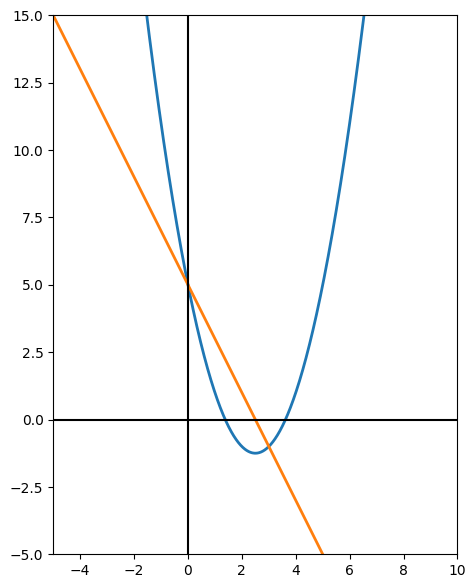

In [7]:
# Teilaufgabe 1. Sie müssen Code nur ausführen!

plt.figure(figsize=(7, 7))

x = np.arange(-20, 20, 0.01)

# Parabel zeichnen
y_p = x**2 - 5 * x + 5
plt.plot(x, y_p, lw=2)

# Gerade zeichnen
y_g = -2 * x + 5
plt.plot(x, y_g, lw=2)

ax = plt.subplot()
ax.set_aspect("equal")
ax.axvline(x=0, color="k", ls="-")
ax.axhline(y=0, color="k", ls="-")
plt.xlim(-5, 10)
plt.ylim(-5, 15)
plt.show()

In [8]:
# Teilaufgabe 2. Führen Sie diesen Code nach Bearbeitung aus.


def plot(x, y):
    plt.figure(figsize=(10, 10))

    # Fügen Sie hier den gesuchten Plotbefehl ein
    plt.?

    ax = plt.subplot()
    ax.set_aspect("equal")
    ax.axvline(x=0, color="k", ls="-")
    ax.axhline(y=0, color="k", ls="-")
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()


# Geben Sie für x den Intervallbereich und für y den Funktionswert an
x = np.arange(?)
y = ?
plot(x, y)

SyntaxError: invalid syntax (2587560392.py, line 8)

In [ ]:
# Teilaufgabe 3
# sympy reserviert 'x' für symbolische Berechnungen

from sympy.abc import x


def roots(a0, a1, a2):

    # Legen Sie die Wert für p und q fest
    p = ?
    q = ?

    # Bestimmen Sie die Diskriminante. Erinnern Sie sich, wofür diese gebraucht wird.
    diskriminante = ?

    # Hier sollen die Variablen x1 und x2 als Nullstellen default auf 0 gesetzt werden.
    x1, ? = (0,0)

    #Hier müssen Sie die pq-Formel umsetzen
    if(diskriminante > 0):
       
        x1 = a - np.sqrt(diskriminante)

        # Was gilt für x2 dann?
        x2 = ?

    elif diskriminante == 0:
        ...
    else ? :
        ...


roots(1, 4, 1)

print("Die Ausgabe über sympy:", sp.roots(x**2 + 4 * x + 1))

SyntaxError: invalid syntax (1964559925.py, line 10)

In [ ]:
# Teilaufgabe 4. Sie müssen diese Code-Zelle nur ausführen!


def plot(a, d, e):
    x = np.arange(-10, 10, 0.01)
    y = a * (x - d) ** 2 + e
    plt.plot(x, y, lw=2)
    ax = plt.subplot()
    ax.set_aspect("equal")
    ax.axvline(x=0, color="k", ls="-")
    ax.axhline(y=0, color="k", ls="-")
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    if d > 0 and e > 0:
        print(
            "{a}*(x - {d})^2 + {e}".format(a=np.round(a), d=np.round(d), e=np.round(e))
        )
    elif d < 0 and e > 0:
        print(
            "{a}*(x + {d})^2 + {e}".format(
                a=np.round(a), d=(-1) * np.round(d), e=np.round(e)
            )
        )
    plt.show()


display(Latex(r"Abgebildet ist der Graph der Funktion $f$ mit $f(x)=a(x-d)^2+e$"))
interactive(
    plot,
    a=widgets.FloatSlider(min=-10, max=10, step=0.01, value=1),
    d=widgets.FloatSlider(min=-10, max=10, step=0.01, value=0),
    e=widgets.FloatSlider(min=-10, max=10, step=0.01, value=0),
)

<IPython.core.display.Latex object>

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=-10.0, step=0.01), FloatSlider(val…

## Die Polynomdivision
<a id="polynomdivision"></a>

Wenn man die Nullstelle einer Polynomfunktion $p$ höheren Grades bestimmen möchte, so kann es hilfreich sein, die Polynomdivision zu verwenden, welche ganz ähnlich zur Division ganzer Zahlen mit Rest verläuft. Nimmt man als Beispiel die Polynomfunktion $p(x) = -x^3+x^2+x+2$, dann kann man die Nullstelle $ x = 2$ durch Ausprobieren herausfinden. Alle weiteren Nullstellen kann man mit weniger Aufwand bestimmen, wenn man die Funktion $p$ mithilfe der Polynomdivision im Grad reduziert. Dafür teilt man $p(x)$ durch die gefundene Nullstelle $x = 2$ als Linearfaktor $(x-2)$. Das Ganze wird in der folgenden Abbildung vorgeführt.

<center><img src="Polynomdivison.png"  width="30%" height="30%"></center><br>

Der erste Schritt ist, sowohl im Dividenden $p(x)$ als auch Divisor $(x-2)$ das Monom mit höchstem Grad zu identifizieren: das sind $-x^3$ und $x$. Anschließend werden beide dividiert, das ergibt $ -x^3 \colon x = -x^2$ als Ergebnis. Nun überlegt man sich, was das Restpolynom sein muss, wenn man das zuvor berechnete Ergebnis mit dem Divisor multipliziert und schließlich von $p(x)$ subtrahiert. In der Abbildung entspricht dies der zweiten Zeile unter $p(x)$: Übrig bleibt das Polynom $-x^2+x$, welches als Nächstes durch $(x-2)$ dividiert wird. Man überlegt sich weiter, dass sich die Vorgehensschritte nun wiederholen und der Algorithmus abbricht, wenn die Restpolynomfunktion entweder konstant $0$ oder vom Grad kleiner als der Divisor ist. 

Sie sollen nun die Polynomdivision als Algorithmus in Python implementieren.

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 3</b>  </p> 

<b>Die Polynomdivision</b>

Implementieren Sie den rekursiven Algorithmus der Polynomdivision über die Methode <code>polDiv(p, q)</code>, welche zwei Polynome $p$ und $q$ als Parameter übernimmt. Ergänzen Sie dazu die Code-Zelle an den markierten Stellen.

<b> Parameter: </b> Die Parameter <code>p</code> und <code>q</code> der Methode <code>polDiv()</code> sollen als Liste aufgefasst werden, wobei die Elemente absteigend die Koeffizienten der Polynomfunktionen darstellen. Ist zum Beispiel $p(x) = 2x^2-2x+1$, so würde $p$ durch <code> p = [2, -2, 1]</code> repräsentiert werden. 

<b>Anforderungen:</b>
Da es sich im Grunde bei der Polynomdivision um eine Divison mit Rest handelt, soll die Methode eine Liste <code>[quot, rest]</code> zurückgegeben, wobei <code>quot</code> den Quotienten $\frac{p}{q} als Polynom mit ganzzahligen Koeeffizienten und <code>rest</code> den eventuellen Rest ungleich $0$ meinen. Denken Sie dabei an die gleiche Listenschreibweise, wie sie unter Parameter dargestellt wurde. Geht die Division glatt auf, soll <code>rest</code> gleich $[0]$ sein.

<b>Beispiel:</b> 
Testen Sie Ihre Methode anhand der Polynomdivision $(3x^3-4x^2+7x+138) : (x+3)$. Dazu übergeben Sie die Elemente <code> p = [3, -4, 7, 138] </code> und  <code> q = [1, 3] </code> an die Methode <code>polDiv()</code>. 

Zur Kontrolle: $(3x^3-4x^2+7x+138) : (x+3) = 3x^2 -13x + 46 $, demnach sollten Sie als Ergebnis <code>[[3, -13, 46], [0]] </code> zurückgegeben bekommen.

In [ ]:
# Polynomdivision 


def polDiv(p, q):

    # erste Abbruchbedingung
    if q[0] == 0:
        print("Die Liste des Divisors darf nicht mit 0 beginnen!")
        return

    # der jeweilige Grad der Polynome wird gespeichert
    deg_p = len(p)
    deg_q = len(q)

    # Falls Restpolynom im Grad kleiner ist, bricht der Algorithmus ab -> Rückgabe
    if deg_q > deg_p:
        return [[], p]

    # Polynomdivision Schritt für Schritt
    # Zunächst Koeffizient bei Divison bestimmen
    coeff = ?

    # Ist coeff tatsächlich ein Integer, findet Type-Casting für die Darstellung statt.
    if coeff.is_integer() == True:
        coeff = int(coeff)


    # Nun wird eine Kopie vom Polynom q in der Liste temp gespeichert.
    temp = q.copy()

    # Hier findet der eigentliche Algorithmusschritt statt. Überlegen Sie, was temp.append(0) mathematisch für die Liste zur Folge hat. Welches Polynom stellt temp dar? Wie lautet der Grad?
    # Wie kann temp dann zur Berechnung des Restpolynoms genutzt werden?
    for i in range(0, ?, 1):
        temp.append(0)

    # Hier wird p durch das neu entstandene Restpolynom überschrieben. Der Algorithmusschritt endet. Bis wohin muss und kann der Laufindex j gehen? Wie wird für den nächsten Schritt p festgelegt?
    for j in range(0, ?, 1):
        p[j] = ?
    p.pop(0)

    # Die restlichen Koeffizienten und das Restpolynom können jetzt rekursiv bestimmt werden
    nextCoeffs, rest = polDiv(p, q)

    # in quot wird der zuerst berechnet Koeffizient gespeichert, die restlichen rekursiv bestimmten Koeffzienten des Quotienten werden angefügt
    quot = [coeff]
    quot.extend(nextCoeffs)

    return [quot, rest]



# Sie müssen folgende Code-Zeilen nicht verstehen. Es wird nur ein String eines Polynoms eingelesen und formatiert zurückgegeben. Es ist keine Veränderung nötig!
def printPol(p):
    pol = ""
    for i in range(0, len(p), 1):
        exp = len(p) - 1 - i
        coeff = p[i]

        if coeff > 0:
            coeff = "+" + str(coeff)

        if coeff == 0 and exp != 0:
            continue

        pol += "{c}x^{{{exp}}}".format(c=coeff, exp=exp)

    pol = pol.replace("x^{0}", "")
    pol = pol.replace("x^{1}", "x")
    pol = pol.replace("+1x", "+x")
    pol = pol.replace("-1x", "-x")

    if pol.startswith("+"):
        pol = pol[1 : len(pol)]

    return pol

In [ ]:
# Polynomdivision hier testen
p = [3, -4, 7, 138]
q = [1, 3]

p_print = printPol(p)
q_print = printPol(q)

quot, rest = polDiv(p, q)

# Überprüfung der Ergebnisse
print(quot, rest)

quot_print = printPol(quot)
rest_print = printPol(rest)

display(
    Latex(
        r"$({dividend}) : ({divisor}) = {pol}$ mit Rest ${pol2}$".format(
            dividend=p_print, divisor=q_print, pol=quot_print, pol2=rest_print
        )
    )
)

[3, -13, 46] [0]


<IPython.core.display.Latex object>

## Die Betragsfunktion
<a id="betragsfunktion"></a>

In vielen Anwendungsgebieten der Mathematik geht es häufiger darum, gute Abschätzungen zu finden. Sie kennen den Betrag als den Abstand zur $0$ auf dem Zahlenstrahl. In natürlicher Weise kann man dann von einer Betragsfunktion sprechen, wenn man von einer Funktion $f$ den Betrag $|f|$ untersucht. Betrachten Sie die Beispiele $f$ und $g$ vom Anfang. Bewegen Sie den Slider und untersuchen Sie, was mit dem Punkt $A$ passiert: Was können Sie allgemein über den Verlauf eines Graphen $|f|$ einer Funktion $f$ sagen?

In [ ]:
def plot(graph, a):
    plt.figure(figsize=(10, 10))

    if graph != "f" and graph != "g":
        print("Bitte geben Sie einen zulässigen Graphen an")
    else:
        leg1 = "$f$"
        leg2 = "$|f|$"
        x = np.arange(-10, 10, 0.01)
        if np.abs(a) > np.sqrt(12) * 100:
            a = a / np.abs(a) * np.sqrt(12) * 100
        x_p = a / 100
        y = x**2 - 2
        y_p = np.abs((a / 100) ** 2 - 2)
        if y_p >= 10:
            y_p = 10

        if graph == "g":
            y = np.sin(x)
            y_p = np.abs(np.sin((a / 100)))
            leg1 = "$g$"
            leg2 = "$|g|$"

        plt.plot(x, y, lw=2, label=leg1)
        plt.plot(x, np.abs(y), lw=2, label=leg2)
        plt.plot(
            x_p,
            y_p,
            marker="o",
            markersize=10,
            markeredgecolor="red",
            markerfacecolor="red",
        )
        plt.legend(loc="upper left")

        ax = plt.subplot()
        ax.text(x_p, y_p + 1, "$A$", usetex=True, fontsize=24)
        ax.set_aspect("equal")
        ax.axvline(x=0, color="k", ls="-")
        ax.axhline(y=0, color="k", ls="-")
        plt.xlim(-10, 10)
        plt.ylim(-10, 10)
        plt.show()


interactive(
    plot, graph="f", a=widgets.FloatSlider(min=-500, max=500, step=0.1, value=0)
)

interactive(children=(Text(value='f', description='graph'), FloatSlider(value=0.0, description='a', max=500.0,…

Einige Abschätzungen können analytisch direkt bestimmt werden. So können einfache Typen von Betragsungleichungen durch Fallunterscheidungen gelöst werden, was an einem einfachen Beispiel vorgezeigt werden soll. Betrachten Sie die Ungleichung $$ |x+3| \geqslant |2x -4|.$$ Im Folgenden löst man diese Ungleichung über Fallunterscheidungen: 

1. Fall: $x+3 \geqslant 0 \iff x \geqslant -3$ und $ 2x -4 \geqslant 0 \iff x \geqslant 2$. Man erhält durch Auflösung der Beträge $$\begin{align*} x+3 &\geqslant 2x-4 \\ \iff \quad -x &\geqslant -7 \\ \iff \quad x &\leqslant 7,\end{align*}$$
    also muss insgesamt $ x \in \left[2,7 \right] $ sein.

2. Fall $x+3 < 0 \iff x < -3$ und $ 2x -4 \geqslant 0 \iff x \geqslant 2$. Das liefert einen Widerspruch, denn kein $x \in \mathbb{R}$ erfüllt diese ungleichung.

3. Fall $x+3 < 0 \iff x < -3$ und $ 2x -4 < 0 \iff x < 2$ 

usw. Führt man die Rechnungen fort, so muss man nur noch alle Lösungen pro Fall vereinigen und kommt insgesamt auf $x \in \left[\dfrac{1}{3},7\right]$ als Lösung heraus.<br>

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 4</b>  </p> 

<b>Teilaufgabe 1:</b><br> 
Berechnen Sie, für welche $x \in \Reals$ die Ungleichung $|x-5| \leqslant |3x-4|$ erfüllt ist. Geben Sie mindestens ein $x \in \mathbb{R} $ in der Code-Zelle an, für das die Ungleichung erfüllt ist.

<b>Teilaufgabe 2:</b><br> 
Berechnen Sie, in welchen Intervallen der Graph der Funktion $f$ mit $f(x) = |x^2-3|$ oberhalb der Ursprungsgeraden $g$ mit $g(x)=x$ liegt. Geben Sie mindestens einen Wert $x$ in die Code-Zelle ein und überprüfen Sie Ihre Eingabe.

In [ ]:
# Teilaufgabe 1

x = -2

left = np.abs(x - 5)
right = np.abs(3 * x - 4)

if left < right:
    display(Latex(r"Ihre Lösung $x = {x}$ ist korrekt.".format(x=x)))
else:
    display(Latex(r"Ihre Lösung $x = {x}$ ist nicht korrekt.".format(x=x)))

<IPython.core.display.Latex object>

In [ ]:
# Teilaufgabe 2
x = 4

left = np.abs(x**2 - 5)
right = x

if left < right:
    display(Latex(r"Ihre Lösung $x = {x}$ ist korrekt.".format(x=x)))
else:
    display(Latex(r"Ihre Lösung $x = {x}$ ist nicht korrekt.".format(x=x)))

<IPython.core.display.Latex object>

### Die Exponentialfunktion
<a id="exponentialfunktion"></a>

Eine alte indische Legende beschrieb bereits die Ausmaße, die exponentielles Wachstum annehmen würde. Teil dieser Legende war, dass man auf einem Schachbrett mit einem Reiskorn beginnt. Pro weiteres Feld wird jeweils die doppelte Menge an Reiskörnern verlangt, d.h. man hätte fortlaufend $2, 4, 8, 16, \dots$ Reiskörner auf dem Schachbrett liegen. Mit insgesamt $63$ Verdopplungen würde man schließlich auf eine Menge von $2^{63}$ Reiskörnern kommen, was ca. $9 \cdot 10^{18}$ Reiskörnern entspricht. Das ist eine Größenordnung, die weit über die jährliche Reisernte hinausgeht. Formal sollen Sie sich im Folgenden mathematisch mit der Exponentialfunktion $f$ gegeben durch $$f(x) = b\cdot a^x$$ für eine positive, relle Zahl $a$ und $b\in \mathbb{R} \setminus \lbrace 0 \rbrace$ auseinandersetzen.

 <div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 5</b>  </p> 

<b>Teilaufgabe 1:</b><br> Bestimmen Sie Nullstellen und den $y$-Achsenabschnitt der Funktion $f$ mit $f(x) = 2^x - 2.$
<hr>

<b>Teilaufgabe 2:</b><br>  Eine Bakterienkultur zum Zeitpunkt $t = 0$ weist einen Bestand von 2500 Einheiten auf. Nach $5\,\text{min}$ sind es schon 4500 Einheiten. Stellen Sie eine Gleichung auf, die die Bakterienkultur <i>pro Minute</i> erfasst. Geben Sie anschließend an, wie viele Bakterien ungefähr nach $12\, \text{min}$ vorzufinden sind. 
<hr>

<b>Teilaufgabe 3:</b><br> Eine ganz besondere Exponentialfunktion stellt die natürliche Exponentialfunktion zur Basis $e = 2{,}718281828...$ dar. Dabei geht die irrationale Zahl $e$ als Grenzwert einer speziellen Folge hervor: Es ist $$ e = \lim_{n \to \infty} \left( 1 + \frac{1}{n}\right)^n $$

i. Berechnen Sie das $1$., $10.$, $100.$ und $1000.$ Folgenglied. Was können Sie über die Konvergenzgeschwindigkeit aussagen?
   
ii. Schreiben Sie eine Funktion <code>partialsum_exp(n)</code>, die die $n$-te Partialsumme $\displaystyle \sum_{k = 0}^{n} \dfrac{1}{k!}$ zum Laufindex $n$ ausgibt. 

<b>Hinweis:</b> Mit $k!$ ist die Fakultät gemeint, welche als Hilfsfunktion gegeben ist. Führen Sie anschließend die Code-Zelle aus. Nutzen Sie den Slider, um Ihre Beobachtunge aufzuschreiben. Was stellen Sie für große $n$ fest? 
<hr>

<b>Teilaufgabe 4.</b><br> Schreiben Sie eine Funktion <code>tolerance(t)</code>, die die Anzahl $n$ angibt, wie viele Folgenglieder es der Partialsumme benötigt, damit die Annäherung zu $e =$ <code>np.exp(1)</code> unter $t$ fällt. Denken Sie daran, dass Sie den Betrag verwenden sollten.

In [ ]:
# Teilaufgabe 3


def factorial(x):
    result = 1
    
    # Hier sollen Sie die Fakultätsberechnung implementieren
    for i in range(1, ?):
        ...

    return result


def partialsum_exp(n):

    result = 0
    for k in range(?):
        result += ?
    return result



def plot(n):
    plt.figure(figsize=(6, 6))
    ax = plt.subplot()
    ax.axvline(x=0, color="k", ls="-")
    ax.axhline(y=0, color="k", ls="-")
    ax.axhline(partialsum_exp(n), color="k", ls="-")

    for i in range(n):
        x = i
        y = partialsum_exp(x)
        plt.plot(
            x, y, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red"
        )

    plt.xlim(0, 100)
    plt.ylim(0, 3)
    print("Zum Wert n =", n, "liegt eine Partialsumme", y, "vor")
    plt.show()


interactive(plot, n=widgets.IntSlider(min=1, max=100, step=1, value=1))

SyntaxError: invalid syntax (1184143.py, line 8)

In [ ]:
# Teilaufgabe 4
def tolerance(t):
    # n wird default auf 1 gesetzt

    n = 1
    approx = partialsum_exp(n)
    # NumPy hat Zugriff auf die natürliche Exponentialfunktion über np.exp(x)
    e = np.exp(1)

    # fehlerAbweichung soll einen Bezug zur Näherung und Fehlertoleranz herstellen. Beachten Sie: Ist fehlerAbweichung größer als die gesetzte Toleranz, ist das n noch zu klein
    fehlerAbweichung = ?

    while fehlerAbweichung >= t:

        # Was passiert mit n, wenn die fehlerAbweichung noch zu groß ist?
        n = ?
        # Wie sieht die neue Näherung aus?
        approx = ?
        # Wie sieht die neue fehlerAbweichung aus?
        fehlerAbweichung = ?

    return n

t = 0.0001
n = tolerance(t)

display(
    Latex(
        r"Damit die Partialsumme $\displaystyle \sum_{{k = 0}}^{{n}} \dfrac{{1}}{{k!}}$ zum Wert $e$ eine Abweichung von weniger als {t} aufweist, muss $n = {n}$ sein.".format(
            t=t, n=n
        )
    )
)

KeyboardInterrupt: 

### Die Umkehrfunktion: injektiv, surjektiv und bijektiv
<a id="umkehrfunktion"></a>

Manche von Ihnen kennen den Logarithmus aus der Schule bereits. Er stellt eine Möglichkeit dar, Exponentialgleichungen zu lösen, etwa $$ 2^x = 8 \iff x = \log_2(8) = 3.$$ In dieser Art und Weise sieht sich der natürliche Logarithmus $\ln(x)$ als Gegenpol zur natürlichen Exponentialfunktion $e^x$, indem $$ e^x = 2 \iff x = \ln(2) $$ gilt. Weiterhin wissen Sie, dass man quadratische Gleichungen mithilfe der Wurzel lösen kann. Beispielsweise ist die Gleichung $$ x^2-2x+1 = 0$$ durch die pq-Formel mit $x = 1 \pm \sqrt{1-1} = 1$ gelöst. Was haben all diese Rechenverfahren gemeinsam? Es handelt sich um Umkehrungen von Rechenoperationen!

Man sagt, eine Funktionen $f(x)$ ist umkehrbar, wenn sie die Eigenschaft der <i>Bijektivität</i> erfüllt. Bijektivität ist dann nur eine Zusammenführung der Eigenschaften <i>injektiv</i> und <i>surjektiv</i>. Bevor Sie sich demnach mit der Umkehrung von Funktionen beschäftigen, sollen Sie zunächst Injektivität und Surjektivität vertiefen.


### Injektivität und Surjektivität

Anhand des Graphen einer Funktion kann man im Wesentlichen schnell die Injektivität nachprüfen. Sie sagt aus, dass jeder Bildpunkt höchstens einen Urbildpunkt besitzen darf. Geometrisch darf also jede Gerade parallel zur $x$-Achse den Graphen horizontal höchstens einmal schneiden. Surjektivität dagegen verlangt, dass jeder Wert aus dem Wertebereich auch Bildpunkt der Funktion ist. Schauen Sie sich ein Beispiel dazu an: Gegeben sei die Funktion $$f \colon [0, \infty) \longrightarrow \mathbb{R},\\ x \mapsto \sqrt{x}.$$ Dann ist $f$ injektiv, aber nicht surjektiv. Woran liegt das? Nimmt man sich zwei Werte $x_1, x_2 \in [0, \infty)$ her mit $f(x_1) = f(x_2)$, dann gilt $$f(x_1) = f(x_2) \iff \sqrt{x_1} = \sqrt{x_2} \implies x_1 = x_2.$$ Folglich hat jeder Bildpunkt höchstens einen Urbildpunkt. Umgekehrt wähle $-1 \in \mathbb{R}$, dann finden wir kein $x \in [0, \infty)$ mit $0 < f(x) = \sqrt{x} = -1$. Die Funktion $f$ kann ergo nicht surjektiv sein. 

Allerdings gilt: Schränkt man den Wertebereich einer Funktion auf ihren Bildbereich ein, so wird diese automatisch surjektiv. Gleiches gilt für den Definitionsbereich. Bei ausreichender Einschränkung kann eine Funktion injektiv werden.

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 6</b>  </p> 

<b>Teilaufgabe 1:</b><br>
Führen Sie den Code aus und bewegen Sie die entsprechenden Slider. Überlegen Sie sich, ob die zum Graphen gehörige Funktion injektiv und/oder surjektiv sein muss oder nichts von beidem erfüllt. Beantworten Sie anschließend die Frage funk_01 im STACK-Modul.

<hr>

<b>Teilaufgabe 2:</b> <br>
Schränken Sie den Definitionsbereich so ein, dass die abgebildete Funktion injektiv wird. Nutzen Sie dafür die vorgesehenen Slider.

<hr>

<b>Teilaufgabe 3:</b> <br>
Zeigen Sie von Hand, dass die Funktion $f$ mit $f(x) = x^3 -1 $ injektiv und surjektiv ist.

In [ ]:
# Teilaufgabe 1
def injective_surjective(graph, slider):
    plt.figure(figsize=(10, 10))

    x = np.arange(-10, 10, 0.01)
    y = x
    c = slider
    t = Symbol("t")

    if graph == 1:
        term = "$f(x) = x$"
        tx, ty = (-7.5, 7.5)
        xp = c
        yp = c

    if graph == 2:
        term = "$f(x) = x^2-5$"
        tx, ty = (-7.5, -7.5)
        y = x**2 - 5

        if c >= -5:
            xp = [-np.sqrt(c + 5), np.sqrt(c + 5)]
            yp = [c, c]
        else:
            xp = 100
            yp = 100

    if graph == 3:
        term = "$f(x) = \displaystyle \\frac{{1}}{{x}}$"
        tx, ty = (-8.5, 7.5)
        x = np.arange(-10, 10, 0.01)
        y = 2 / x
        t = Symbol("t")
        if c != 0:
            xp = 2 / c
            yp = c
        else:
            xp = 100
            yp = 100

    plt.plot(x, y, markeredgecolor="blue", markerfacecolor="blue")
    plt.plot(
        xp, yp, marker="o", markersize=7, markeredgecolor="red", markerfacecolor="red"
    )

    ax = plt.subplot()
    ax.set_aspect("equal")
    ax.axvline(x=0, color="k", ls="-")
    ax.axhline(y=0, color="k", ls="-")
    ax.axhline(c, color="r", ls="--")
    ax.text(tx, ty, "{term}".format(term=term), usetex=True, fontsize=20)

    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()


interactive(
    injective_surjective,
    graph=widgets.IntSlider(min=1, max=3, step=1, value=1),
    slider=widgets.FloatSlider(min=-10, max=10, step=0.01, value=0),
)

interactive(children=(IntSlider(value=1, description='graph', max=3, min=1), FloatSlider(value=0.0, descriptio…

In [ ]:
# Teilaufgabe 2
def restriction(left, right):
    if left < right:
        plt.figure(figsize=(10, 10))
        x_ = np.arange(-10, 10, 0.01)
        x = np.arange(left, right, 0.01)
        y = 0.125 * x**3 + 0.75 * x**2 - x - 1
        y_ = 0.125 * x_**3 + 0.75 * x_**2 - x_ - 1

        ax = plt.subplot()
        plt.plot(x_, y_, color="gray", ls="--", linewidth=0.75)
        plt.plot(x, y, color="b", linewidth=1)

        ax.set_aspect("equal")
        ax.axvline(x=0, color="k", ls="-")
        ax.axvline(x=left, color="r", ls="--", linewidth=0.75)
        ax.axvline(x=right, color="r", ls="--", linewidth=0.75)
        ax.axhline(y=0, color="k", ls="-")
        ax.text(-9, 9, "$f(x) = 0.125x^3+0.75x^2-x-1$", usetex=True, fontsize=14)

        print(
            "f wird auf den Bereich [{left}, {right}] eingeschränkt.".format(
                left=np.round(left, decimals=3), right=np.round(right, decimals=2)
            )
        )
        plt.xlim(-10, 10)
        plt.ylim(-10, 10)
        plt.show()
    else:
        print("Bitte Intervallgrenzen beachten!")


interactive(
    restriction,
    left=widgets.FloatSlider(min=-10, max=10, step=0.01, value=-10),
    right=widgets.FloatSlider(min=-10, max=10, step=0.01, value=10),
)

interactive(children=(FloatSlider(value=-10.0, description='left', max=10.0, min=-10.0, step=0.01), FloatSlide…

### Bijektivitität

Weiß man, dass eine Funktion injektiv und surjektiv und damit <i>bijektiv</i> ist, kann man sich das Ziel setzen, eine Umkehrfunktion zu finden. Für Polynomfunktionen lässt sich eingeschränkt eine geschlossene Formel finden, bei der Exponentialfunktion $e^x$ benötigt man bereits einen eigenen Namen $\ln$ für die Umkehrfunktion. Arbeiten Sie folgendes Beispiel zur Veranschaulichung durch, um im Anschluss eigenständig Umkehrfunktionen zu bestimmen: Gegeben ist die bijektive Funktion $$f \colon [1, \infty) \longrightarrow [0, \infty), \quad f(x) = x^2-2x+1$$ Führen Sie anschließend die Code-Zelle aus, um sich den Graphen der Funktion $f$ in blau ausgeben zu lassen. Bewegen Sie den Slider und verfolgen Sie, was mit dem eingezeichneten blauen Punkt passiert. Der dazugehörige rote Punkt verläuft auf dem Graphen der Umkehrfunktion.

In [ ]:
def inverse(slider):
    plt.figure(figsize=(7.5, 7.5))

    x = np.arange(1, 10, 0.01)
    y = x**2 - 2 * x + 1

    x_inv = np.arange(0, slider, 0.01)
    y_inv = np.sqrt(x_inv) + 1

    xp = slider
    yp = np.sqrt(xp) + 1

    line_x = np.arange(0, 10, 0.01)
    line_y = line_x

    plt.plot(line_x, line_y, color="gray", ls="--", linewidth=1)
    plt.plot(x, y, color="b", linewidth=1.5)
    plt.plot(x_inv, y_inv, color="r", linewidth=1.5)

    plt.plot(
        yp, xp, marker="o", markersize=7, markeredgecolor="blue", markerfacecolor="blue"
    )
    plt.plot(
        xp, yp, marker="o", markersize=7, markeredgecolor="red", markerfacecolor="red"
    )

    ax = plt.subplot()
    ax.set_aspect("equal")
    ax.axvline(x=0, color="k", ls="-")
    ax.axhline(y=0, color="k", ls="-")

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.show()


interactive(inverse, slider=widgets.FloatSlider(min=0, max=10, step=0.01, value=0))

interactive(children=(FloatSlider(value=0.0, description='slider', max=10.0, step=0.01), Output()), _dom_class…

Es ist zu erkennen, dass jeder Bildpunkt von $f$ entlang der Ursprungsgeraden gespiegelt wird! Das hilft, sofern möglich, eine geschlosene Formel für die Umkehrfunktion zu finden, denn die Idee ist schließlich, die Rollen der Koordinaten $x$ und $y$ eines Bildpunktes zu vertauschen. Also müssen Sie nur $y = f(x)$ nach $x$ umformen (unter der Berücksichtung des Definitionsbereichs):

$$\begin{align*} &\quad x^2-2x+1  = y \\ \iff &\quad (x-1)^2 = y \\ \iff &\quad x-1 = \sqrt{y} \\ \iff &\quad x = \sqrt{y} + 1 \end{align*}$$ 

Mit anderen Worten, die Umkehrfunktion $f^{-1}$ hat den Funktionsterm $f^{-1}(x) = \sqrt{x} + 1.$

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 7</b>  </p> 

Skizzieren Sie den Graphen der Umkehrfunktion zu $f \colon [0, \infty) \longrightarrow [0, \infty) $ mit $f(x) = xe^{x^2} $. Nutzen Sie dafür die Code-Zelle, um sich den Graphen von $f$ ausgeben zu lassen.


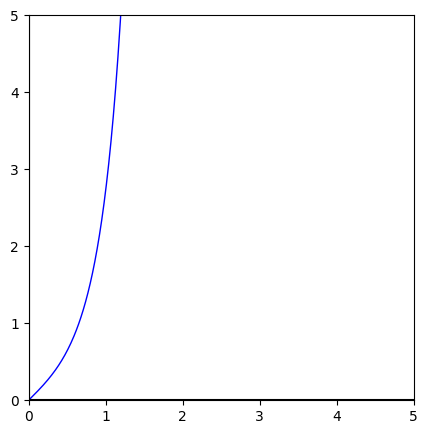

In [ ]:
def plot():
    plt.figure(figsize=(5, 5))

    x = np.arange(0, 10, 0.01)
    y = x * np.exp(1) ** (x**2)

    ax = plt.subplot()
    plt.plot(x, y, color="b", linewidth=1)

    ax.set_aspect("equal")
    ax.axvline(x=0, color="k", ls="-")
    ax.axhline(y=0, color="k", ls="-")
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.show()


plot()

### Die Arkussinus-Funktion
<a id="arkussinus"></a>

Es ist klar, dass die Sinus-Funktion $\sin \colon \Reals \longrightarrow \Reals$ auf den gegebenen Definitions- und Wertebereichen nicht umkehrbar ist. Beachtet man, dass $-1 \leq \sin(x) \leq 1$ für alle $x \in \Reals$ gilt und auch jeder Wert $[-1,1]$ von der Sinus-Funktion getroffen wird, so sollte der Wertebereich auf $W = [-1,1]$ eingeschränkt werden. 

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 8</b>  </p> 

Entnehmen Sie anhand der Code-Zelle einen sinnvollen, <i> maximalen </i> Definitionsbereich um die $0$ herum, infolgedessen der Sinus umkehrbar wird. Erinnern Sie Sich dazu daran, welche Eigenschaft einer Funktion im Allgemeinen erfüllt sein muss, wenn die graue, gestrichelte Kurve die Spiegelung des Graphen der Sinus-Funktion an der Ursprungsgeraden darstellt.

In [ ]:
pi = np.pi


def arcsin(left, right):
    if left < right:
        plt.figure(figsize=(10, 10))

        pi = np.pi

        x = np.arange(left, right, 0.01)
        y = np.sin(x)

        y_inv = np.arange(left, right, 0.01)
        x_inv = np.sin(y_inv)

        x_sin = np.arange(-10, 10, 0.01)
        y_sin = np.sin(x_sin)

        plt.plot(x_sin, y_sin, color="gray", ls="--", linewidth=1)
        plt.plot(x_inv, y_inv, color="gray", linewidth=1.5, ls="--")

        plt.plot(x, y, color="b", linewidth=1.5)
        ax = plt.subplot()
        if left >= -pi / 2 and right <= pi / 2:
            plt.plot(x_inv, y_inv, color="r", linewidth=1.5)

        alpha = np.arange(-2 * pi, 2 * pi + pi / 2, step=(pi / 2))

        ax.axvline(x=0, color="k", ls="-")
        ax.axvline(x=left, color="gray", ls="--", linewidth=1)
        ax.axvline(x=right, color="gray", ls="--", linewidth=1)
        ax.axhline(y=0, color="k", ls="-")
        plt.xticks(alpha, ["-2π", "-3π/2", "π", "-π/2", "0", "π/2", "π", "3π/2", "2π"])
        plt.xlim(-2 * np.pi, 2 * np.pi)
        plt.ylim(-2 * np.pi, 2 * np.pi)
        plt.show()
    else:
        print("Bitte Intervallgrenzen beachten!")


interactive(
    arcsin,
    left=widgets.FloatSlider(min=-2 * pi, max=2 * pi, step=0.01, value=-2 * pi),
    right=widgets.FloatSlider(min=-10, max=10, step=0.01, value=2 * pi),
)

interactive(children=(FloatSlider(value=-6.283185307179586, description='left', max=6.283185307179586, min=-6.…

Das liefert die Umkehrung der Sinus-Funktion, genannt <i>Arkussinus</i> $$\arcsin \colon [-1, 1] \longrightarrow \left[ -\frac{\pi}{2}, \frac{\pi}{2} \right], \quad x \mapsto \arcsin(x).$$ In Python können Sie Werte der Arkussinus-Funktion mithilfe von <code>numpy</code> berechnen:

In [ ]:
x = -1  # x muss zwischen -1 und 1 sein

value = np.arcsin(x)  # Aufruf der Arkussinus-Funktion über numpy
display(Latex((r"$\arcsin({x}) = {value}$".format(x=x, value=value))))

<IPython.core.display.Latex object>

Im Folgenden Kontext wird es eine Aufgabe geben, in der Sie den Arkussinus anwenden sollen.

In einem Basketball-Verein wird der Ballwurf trainiert. Jede:r Spieler:in stellt dazu die Körpergröße und die Abwurfgeschwindigkeit bereit, allerdings liegen die Abwurfwinkel jeweils in einem Bereich von $30°$ bis $80°$, weshalb der Korb nicht immer getroffen wird. Schauen Sie sich exemplarisch für 3 Spieler:innen das Wurfszenario an. Initialisieren Sie dazu die Parameter zuerst und führen anschließend die folgende Code-Zelle aus:

In [ ]:
# Parameter initialisieren

h = [1.89, 2.13, 1.78]  # Größe in m
v = [7.6, 7.5, 7.8]  # Geschwindigkeit in m/s
g = 9.81  # Erdbeschleunigung in m/s^2

In [ ]:
def basketball(number, theta):
    xp = 0
    yp = h[number]

    t = np.arange(0, 2, 0.01)
    x = v[number] * np.cos(theta) * t
    y = h[number] + v[number] * np.sin(theta) * t - 0.5 * g * t**2

    x_points = np.array([3.8, 4.2, 4.3, 3.7])
    y_points = np.array([2.5, 2.5, 3, 3])

    plt.figure(figsize=(10, 10))
    ax = plt.subplot()
    ax.axvline(x=0, color="gray", ls="-")
    ax.axhline(y=0, color="k", ls="-")
    plt.plot(x, y, color="b", linewidth=1.5)
    plt.plot(
        xp, yp, marker="o", markersize=15, markeredgecolor="red", markerfacecolor="red"
    )

    size = len(x_points)
    for i in range(size):
        ax.plot(
            [x_points[i], x_points[(i + 1) % size]],
            [y_points[i], y_points[(i + 1) % size]],
            linewidth=2,
            color="g",
        )

    plt.xlim(-1, 6)
    plt.ylim(0, 5)
    plt.show()


interactive(
    basketball,
    number=widgets.IntSlider(min=0, max=2, step=1, value=0),
    theta=widgets.FloatSlider(
        min=30 / 360 * 2 * pi, max=80 / 360 * 2 * pi, step=0.01, value=30 / 360 * 2 * pi
    ),
)

interactive(children=(IntSlider(value=0, description='number', max=2), FloatSlider(value=0.5235987755982988, d…

<div style= "color: black;background-color: powderblue ;margin: 10 px auto; padding: 10px; border-radius: 10px">
    <p style="font-size:12pt; text-align:center; color:   black; background-color: lightskyblue ;margin: 10 px auto; padding: 10px; border-radius: 10px" id="1"><b>Aufgabe 10</b>  </p> 
<b>Winkelberechnung</b>

Die Basketballmannschaft soll das Training nun so gestalten, dass der Abwurfwinkel optimiert wird. Das ist so gemeint, dass beim Abwurf der Ball mindestens eine Höhe von $h_{min} = 4\,\text{m}$  und maximal $h_{max} =  5\,\text{m}$ erreicht. Die Flugkurve des Basketballs in horizontaler und vertikaler Richtung pro Zeiteinheit $t$ in $s$ kann beschrieben werden durch $$ x(t) = v \cdot \cos(\theta) \cdot t, \quad y(t) = h + v\cdot \sin(\theta) \cdot t - \frac{1}{2}\cdot g \cdot t^2,$$ wobei mit $g \approx 9{,}81 \frac{m}{s^2}$ die Erdbeschleunigung, $v$ die Abwurfgeschwindigkeit und $h$ die Höhe zum Start des Abwurfs gemeint sind. Die Mitte des Basketballkorbs soll nach wie vor in $l = 4$ m Entfernung und $h_k = 3$ m Höhe zur Abwurfposition stehen. 



Ergänzen Sie die Methode <code>calculateAngle(h, v)</code>, die in Abhängigkeit von der Größe $h$ und Abwurfgeschwindigkeit $v$ der Spieler:innen einen Winkel $\theta$ im Bogenmaß als auch Winkelmaß bestimmt, sodass der Basketball unter genannten Bedingungen etwa durch die Mitte des Korbs fällt. Existiert solch ein Winkel nicht, geben Sie $0$ zurück.

<b>Parameter:</b> Eine sinnvolle Wahl der Parameter <code>h</code> für die Größe und <code>v</code> für die Geschwindigkeit ist aus den Listen der vorigen Code-Zellen zu entnehmen. Das sollten sie beim Berechnen beachten.

<b>Hinweis:</b> Sie dürfen dabei verwenden, dass der Basketball zum Zeitpunkt $$t = \displaystyle \frac{v\cdot \sin (\theta)}{g} $$ seinen höchsten Punkt erreicht.

<b>Beispiel:</b> Nach korrekter Ausführung sollte Ihnen bei <code>calculateAngle(1.78, 7.8) = [1.15, 65.81] </code>  zurückgegeben werden. Das entspricht dem Winkel $\theta = 1{,}15$ im Bogenmaß, bzw. $\theta = 65{,}81°$ im Winkelmaß (als Näherung).

In [ ]:
def calculateAngle(h, v):
    # Parameter aus der Aufgabe festlegen

    pi = np.pi
    g = ?
    l = ?
    h_min = ?
    h_max = ?

    # Randfälle für h abgreifen
    if h >= 5 or h < 0:
        return [0, 0]

    # Aus dem Aufgabentext müssen Sie entnehmen, in welchen Bereichen sich sin(theta) befindet, lesen Sie den Hinweis dazu; np.min stellt sicher, dass Sie den Wertebreich nicht verlassen. 
    range_min = np.min([?, np.sqrt((2 * (h_min - h) * g) / (v**2))])
    range_max = np.min([1, ?])

    # Abwurfwinkel berechnen, damit Mindesthöhe und maximale Höhe erreicht werden. 
    theta_min = ?
    theta_max = ?

    # Prüfen, ob Winkel auch den Korb ca. mittig trifft. Man startet mit dem Minimum theta_min
    theta = theta_min

    # Was muss für theta gelten?
    while theta <= ? :
        # Hier müssen Sie die Entscheidung treffen, ob der Basketball etwa mittig den Korb trifft. Betrachten Sie das Problem zeitabhängig
        t = ?
        y = ?

        # Trifft der Ball dann den Korb? Gehen Sie von einer Abweichung von 0.1 aus. Wie überprüfen Sie das?
        if y >= ? and y <= ?:
        
            # Falls ja, haben Sie ihr theta gefunden. Der Algortihmus bricht ab.
            break
            
        # theta wird um 0.01 vergrößert
        theta = theta + 0.01

    # Falls Winkel Gültigkeitsbereich verlässt, 0 zurückgeben
    if theta > theta_max:
        theta = 0

    # Geben Sie eine Liste zurück, die theta im Bogenmaß und Winkelmaß beinhaltet.
    return [?, ?]


# Methode testen
bogenmaß, gradmaß = calculateAngle(1.78, 7.8)

display(
    Latex(
        r"Der Winkel muss $\alpha = {alpha}$ bzw. $\alpha\prime = {beta}°$ sein".format(
            alpha=round(bogenmaß, 2), beta=round(gradmaß, 2)
        )
    )
)